In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
# Plot settings
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

In [5]:
# Load datasets
trades_df = pd.read_csv('/content/drive/MyDrive/data/historical_data.csv')
sentiment_df = pd.read_csv('/content/drive/MyDrive/data/fear_greed_index.csv')

## 1. Clean and preprocess data

In [6]:
# Clean column names (lowercase, no spaces)
trades_df.columns = trades_df.columns.str.strip().str.lower().str.replace(' ', '_')
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()


In [7]:
# Convert timestamp to datetime
trades_df['timestamp_ist'] = pd.to_datetime(trades_df['timestamp_ist'], errors='coerce')
trades_df['date'] = trades_df['timestamp_ist'].dt.date
trades_df['date'] = pd.to_datetime(trades_df['date'])

In [8]:
# Drop invalid timestamps
trades_df = trades_df.dropna(subset=['timestamp_ist'])

In [9]:
# Rename classification to 'sentiment' for clarity
sentiment_df.rename(columns={'classification': 'sentiment'}, inplace=True)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [10]:
# Filter sentiment to relevant trade dates
valid_dates = trades_df['date'].unique()
sentiment_df_filtered = sentiment_df[sentiment_df['date'].isin(valid_dates)]

In [11]:
merged_df = pd.merge(trades_df, sentiment_df_filtered, on='date', how='inner')

In [12]:
trades_df.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12


In [13]:
# Merge trades with sentiment data
merged_df = pd.merge(trades_df, sentiment_df, on='date', how='inner')

In [14]:
merged_df.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed


## 2. Feature Engineering

In [15]:
# Ensure numeric values
merged_df['closed_pnl'] = pd.to_numeric(merged_df['closed_pnl'], errors='coerce')
merged_df['fee'] = pd.to_numeric(merged_df['fee'], errors='coerce')
merged_df['size_usd'] = pd.to_numeric(merged_df['size_usd'], errors='coerce')

In [16]:
merged_df['profitable'] = merged_df['closed_pnl'] > 0

In [17]:
# Group by date and sentiment
daily_summary = (
    merged_df.groupby(['date', 'sentiment'])
    .agg({
        'closed_pnl': ['mean', 'sum', 'count'],
        'profitable': 'mean',
        'fee': 'mean',
        'size_usd': 'mean'
    })
    .reset_index()
)


In [18]:
# Rename columns
daily_summary.columns = [
    'date', 'sentiment', 'avg_pnl', 'total_pnl', 'num_trades',
    'win_rate', 'avg_fee', 'avg_trade_size_usd'
]

## 3. Summary Statistics

In [19]:
summary_stats = daily_summary.groupby('sentiment').agg({
    'avg_pnl': 'mean',
    'win_rate': 'mean',
    'avg_trade_size_usd': 'mean'
}).reset_index()

print("\n Summary Statistics by Sentiment:\n")
print(summary_stats)



 Summary Statistics by Sentiment:

       sentiment    avg_pnl  win_rate  avg_trade_size_usd
0   Extreme Fear   8.951448  0.307500         2191.149008
1  Extreme Greed  46.834938  0.319642         7954.335976
2           Fear  56.312059  0.348071         6014.623918
3          Greed  29.148125  0.362415         6352.086535
4        Neutral  28.283112  0.286719         7191.752725


## 4. Visualizations

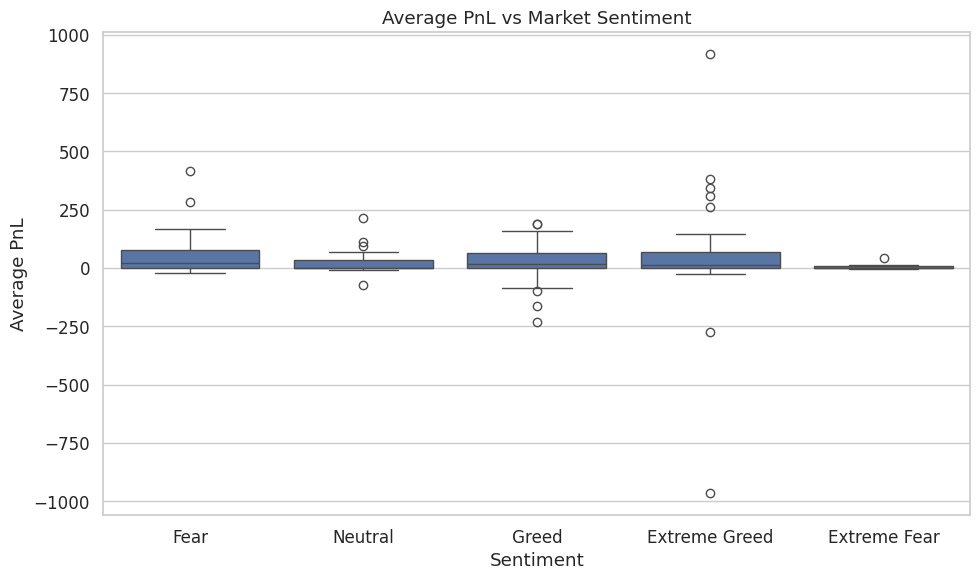

In [20]:
sns.set(style='whitegrid', font_scale=1.1)

# PnL Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='avg_pnl', data=daily_summary)
plt.title('Average PnL vs Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average PnL')
plt.tight_layout()
plt.show()

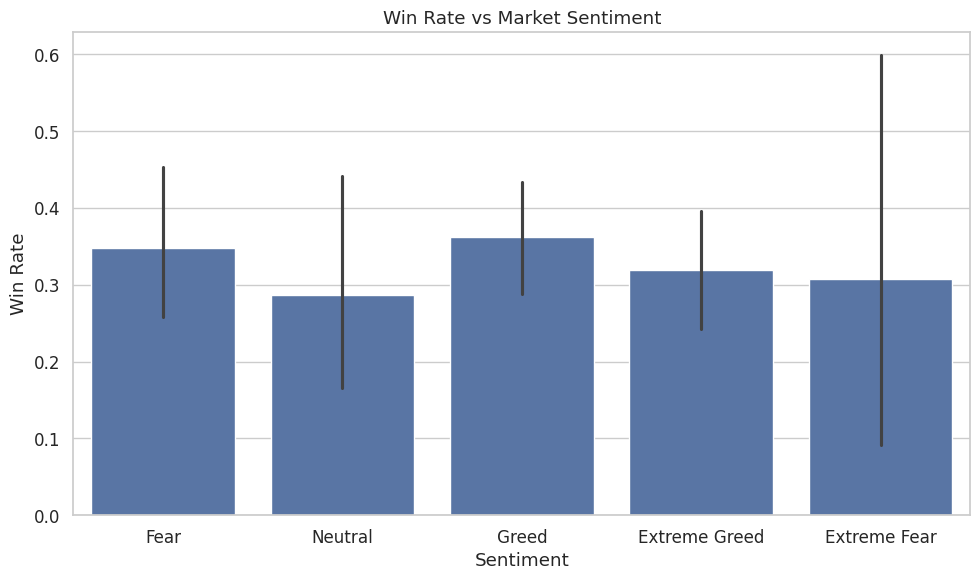

In [21]:
# Win Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='win_rate', data=daily_summary)
plt.title('Win Rate vs Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Win Rate')
plt.tight_layout()
plt.show()

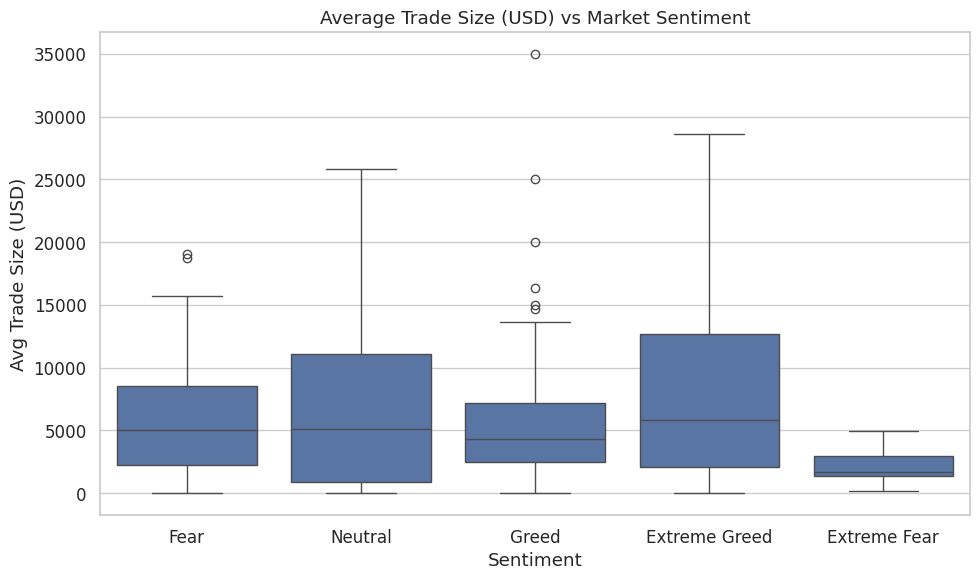

In [22]:
# Trade Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='avg_trade_size_usd', data=daily_summary)
plt.title('Average Trade Size (USD) vs Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Avg Trade Size (USD)')
plt.tight_layout()
plt.show()

## 5. Generate Insights

In [23]:
def generate_insights(df):
    insights = []
    for sentiment in df['sentiment'].unique():
        sub = df[df['sentiment'] == sentiment]
        insights.append(f" When market sentiment is **{sentiment.upper()}**:")
        insights.append(f"   - Average PnL: ${sub['avg_pnl'].mean():.2f}")
        insights.append(f"   - Win Rate: {sub['win_rate'].mean() * 100:.2f}%")
        insights.append(f"   - Average Trade Size: ${sub['avg_trade_size_usd'].mean():.2f}")
        insights.append("")
    return "\n".join(insights)

print("\n Insights Summary:\n")
print(generate_insights(daily_summary))


 Insights Summary:

 When market sentiment is **FEAR**:
   - Average PnL: $56.31
   - Win Rate: 34.81%
   - Average Trade Size: $6014.62

 When market sentiment is **NEUTRAL**:
   - Average PnL: $28.28
   - Win Rate: 28.67%
   - Average Trade Size: $7191.75

 When market sentiment is **GREED**:
   - Average PnL: $29.15
   - Win Rate: 36.24%
   - Average Trade Size: $6352.09

 When market sentiment is **EXTREME GREED**:
   - Average PnL: $46.83
   - Win Rate: 31.96%
   - Average Trade Size: $7954.34

 When market sentiment is **EXTREME FEAR**:
   - Average PnL: $8.95
   - Win Rate: 30.75%
   - Average Trade Size: $2191.15

